## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

Anna Lucia Moro Lanzuolo
SME0823 - Modelos de Regressão e Aprendizado Supervisionado II
---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/lukalanzu/Avalicao2-Regressao/main/sneeze4.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


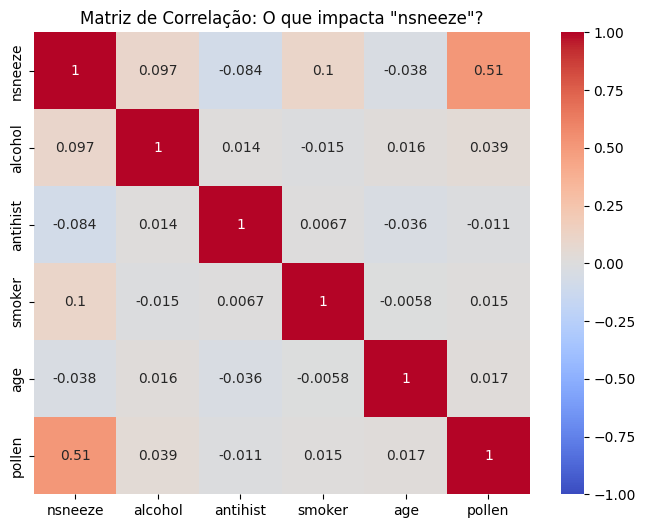

In [3]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação: O que impacta "nsneeze"?')
plt.show()

<Figure size 1000x600 with 0 Axes>

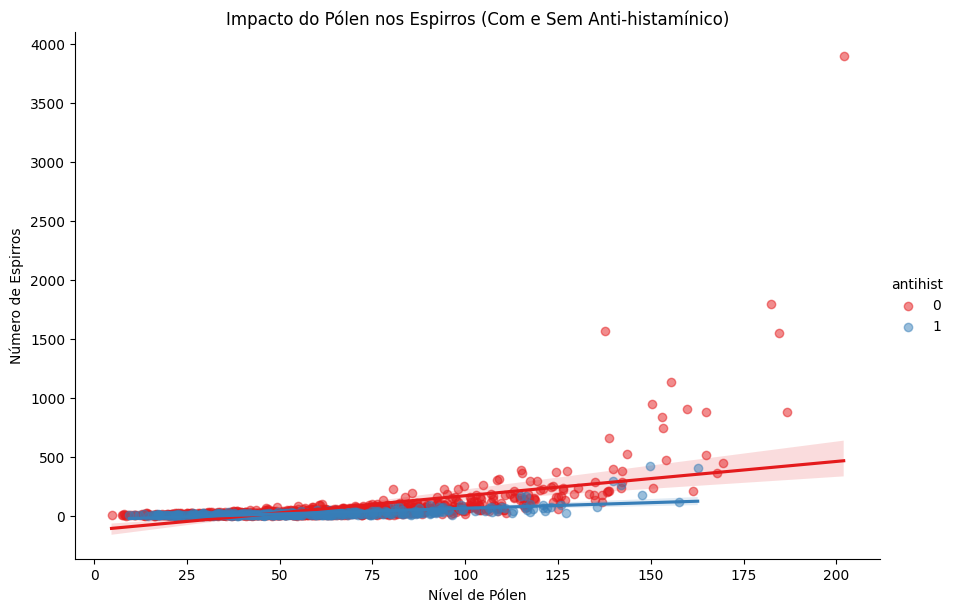

<Figure size 1000x600 with 0 Axes>

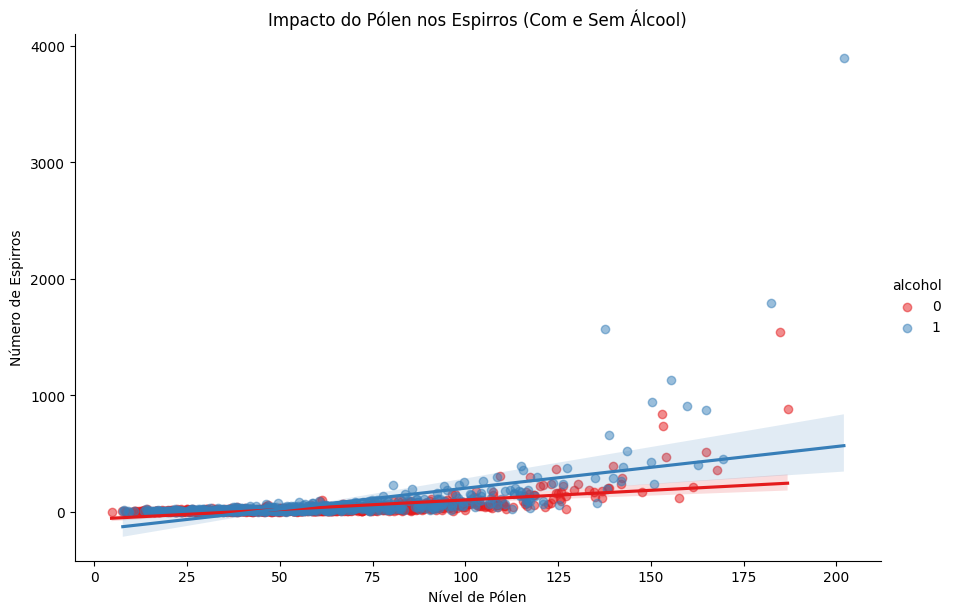

<Figure size 1000x600 with 0 Axes>

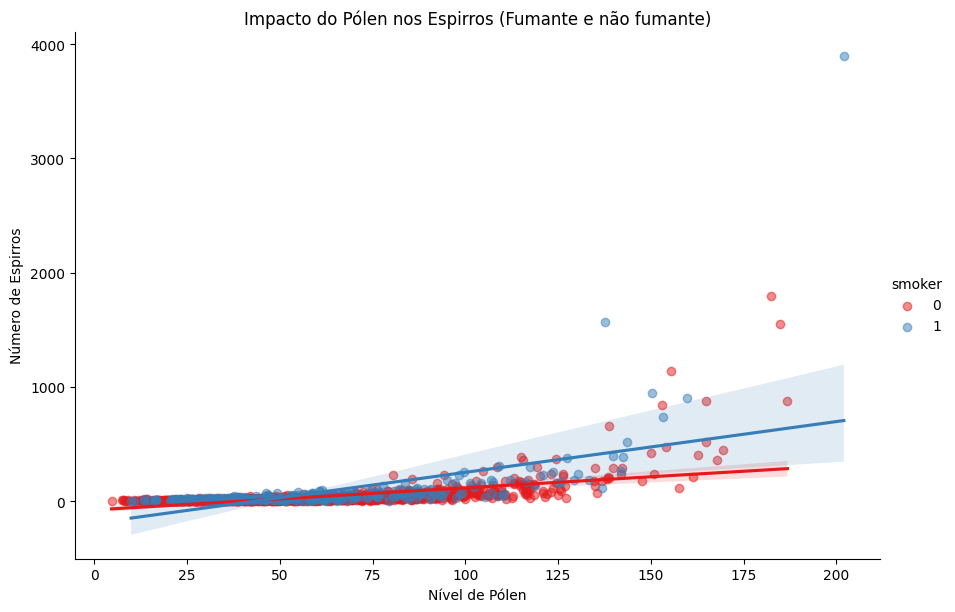

In [4]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='pollen', y='nsneeze', hue='antihist',
           palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Impacto do Pólen nos Espirros (Com e Sem Anti-histamínico)')
plt.xlabel('Nível de Pólen')
plt.ylabel('Número de Espirros')
plt.show()


plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='pollen', y='nsneeze', hue='alcohol',
           palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Impacto do Pólen nos Espirros (Com e Sem Álcool)')
plt.xlabel('Nível de Pólen')
plt.ylabel('Número de Espirros')
plt.show()

plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='pollen', y='nsneeze', hue='smoker',
           palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Impacto do Pólen nos Espirros (Fumante e não fumante)')
plt.xlabel('Nível de Pólen')
plt.ylabel('Número de Espirros')
plt.show()

Text(0, 0.5, 'Número de Espirros')

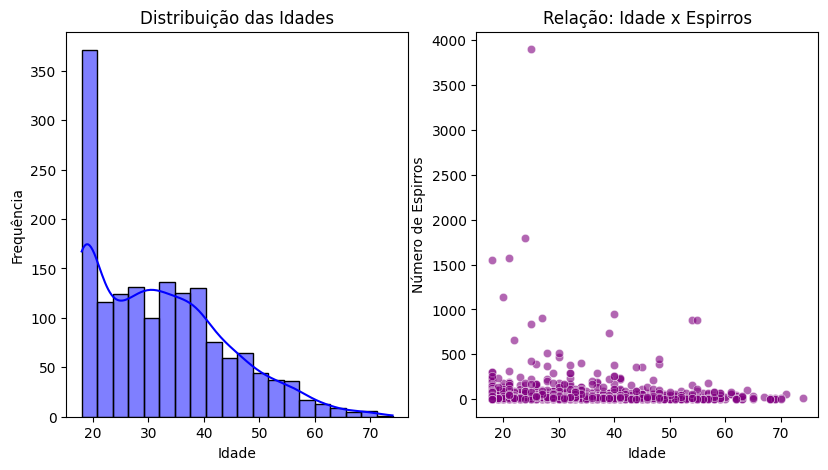

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='age', y='nsneeze', alpha=0.6, color='purple')
plt.title('Relação: Idade x Espirros')
plt.xlabel('Idade')
plt.ylabel('Número de Espirros')

Pela visualiazação doss gráficos podemos concluir que a idade não possui correlação com o número de espirros. Contudo não se pode dizer o mesmo para o consumo de álcool, cigarro e o uso do remédio. Pelos gráficcoss podemos concluir que a medicação diminui drasticamente a quantidade de espirros. Diferente do consumo de álcool e cigarro, os quais aumentam a ocorrência de espirros. Além disso a quantidade de pólem também possui uma correlação positiva muito alta, ou seja,, quanto mais pólem maior a quantidade de espirros.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [6]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [8]:
formula = 'nsneeze ~ alcohol + antihist + smoker + age + pollen'


model = smf.glm(
  formula=formula,
  data=df,
  family=sm.families.Poisson()
)
results = model.fit()

coef_df = results.params.to_frame(name='Coeficiente (Log Scale)')

coef_df['P > |z|'] = results.pvalues.round(4)

coef_df['Taxa de Incidência (e^beta)'] = np.exp(results.params).round(4)

def interpret_p(p):
  if p < 0.001:
    return 'Alto (P < 0.001)'
  elif p < 0.05:
    return 'Significativo (P < 0.05)'
  else:
    return 'Não Significativo'

coef_df['Significância (α=0.05)'] = coef_df['P > |z|'].apply(interpret_p)

coef_df = coef_df[['Coeficiente (Log Scale)', 'Taxa de Incidência (e^beta)', 'P > |z|', 'Significância (α=0.05)']]

print("Tabela de Estimativas dos Coeficientes e Significância:")
print(coef_df)


Tabela de Estimativas dos Coeficientes e Significância:
           Coeficiente (Log Scale)  Taxa de Incidência (e^beta)  P > |z|  \
Intercept                 1.500231                       4.4827      0.0   
alcohol                   0.443938                       1.5588      0.0   
antihist                 -0.611652                       0.5425      0.0   
smoker                    0.427718                       1.5338      0.0   
age                      -0.012685                       0.9874      0.0   
pollen                    0.031389                       1.0319      0.0   

          Significância (α=0.05)  
Intercept       Alto (P < 0.001)  
alcohol         Alto (P < 0.001)  
antihist        Alto (P < 0.001)  
smoker          Alto (P < 0.001)  
age             Alto (P < 0.001)  
pollen          Alto (P < 0.001)  


Pelos resultados obtidos podemos concluir que todas as variáveis do estudo possuem alta significância por possuirem P-Valor menor que 0.001. Além disso, pelos resultados da taxa de incidência podemos concluir que a cada uma unidade de álcool e de cigarro ingerida a quantidade de espirros aumenta 55% e 53%, respectivamente. Se a idade aumenta a quantidade de espirros diminui, assim como a ingestão do medicamento. Além disso, se a quantidade de polém aumenta em uma unidade a quantidade de espirros aumenta em 3,19%.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [9]:
# Usando o método da razão dispersão

# Usando desvio
deviance = results.deviance
df_resid = results.df_resid
ratio_deviance = deviance / df_resid

# Usando qui-quadrado
chi2_pearson = np.sum(results.resid_pearson**2)
ratio_pearson = chi2_pearson / df_resid

print("Resultados do Método da Razão da Dispersão")
print(f"Desvio (Deviance) do Modelo: {deviance:.2f}")
print(f"Graus de Liberdade (DF Resid.): {df_resid:.0f}")
print(f"Razão da Dispersão (Deviance / DF): {ratio_deviance:.3f}")
print(f"Razão da Dispersão (Pearson Chi2 / DF): {ratio_pearson:.3f}")



Resultados do Método da Razão da Dispersão
Desvio (Deviance) do Modelo: 15063.68
Graus de Liberdade (DF Resid.): 1594
Razão da Dispersão (Deviance / DF): 9.450
Razão da Dispersão (Pearson Chi2 / DF): 9.985


In [10]:
# Teste fator dispersão
model_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial()
)
ajuste_nb = model_nb.fit()

print("\nResultados do Método do Teste do Modelo Binomial Negativo")
alpha_nb = ajuste_nb.scale

print(f"Parâmetro de Dispersão (alpha) do Modelo Binomial Negativo: {alpha_nb:.4f}")


Resultados do Método do Teste do Modelo Binomial Negativo
Parâmetro de Dispersão (alpha) do Modelo Binomial Negativo: 1.0000


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Observando os resultados dos dois testes podemos concluir que o parâmetro de dispersão é muito maior que 0 e que o valor da razão da dispersão também é muito maior que 0, o conclui que os dados possuem uma superdispersão, tornando o modelo de poisson inadequado para esse problema.

In [11]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

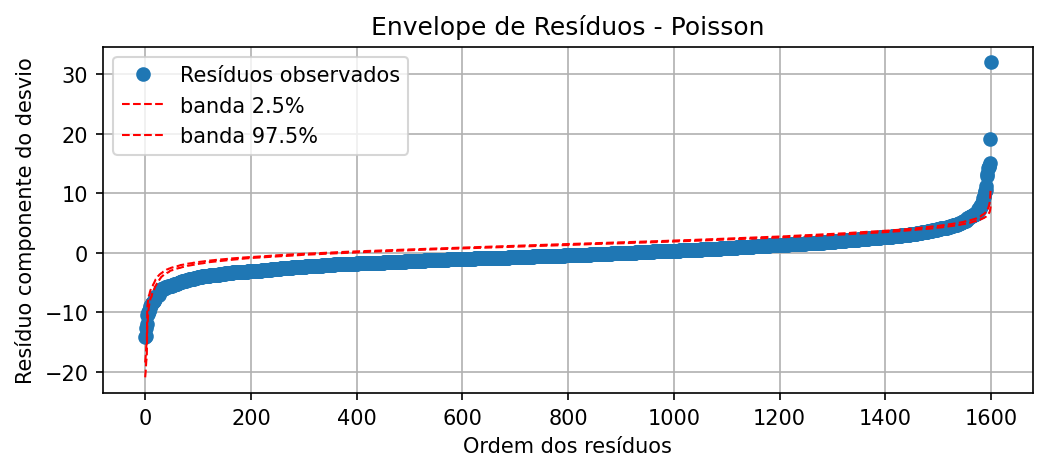

In [12]:
#results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)
ajuste_nb = model_nb.fit()

In [15]:
ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)

print("Modelos Ajustados.")
print("Comparação de Ajustes")
comparacao = pd.DataFrame({
    'Modelo': ['Poisson', f'Binomial Negativo (α=0.2)'],
    'Desvio (Deviance)': [results.deviance, ajuste_nb.deviance],
    'AIC': [results.aic, ajuste_nb.aic]
})
print(comparacao.set_index('Modelo').round(2))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Thu, 27 Nov 2025   Deviance:                       1785.6
Time:                        22:51:58   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4703      0.047  

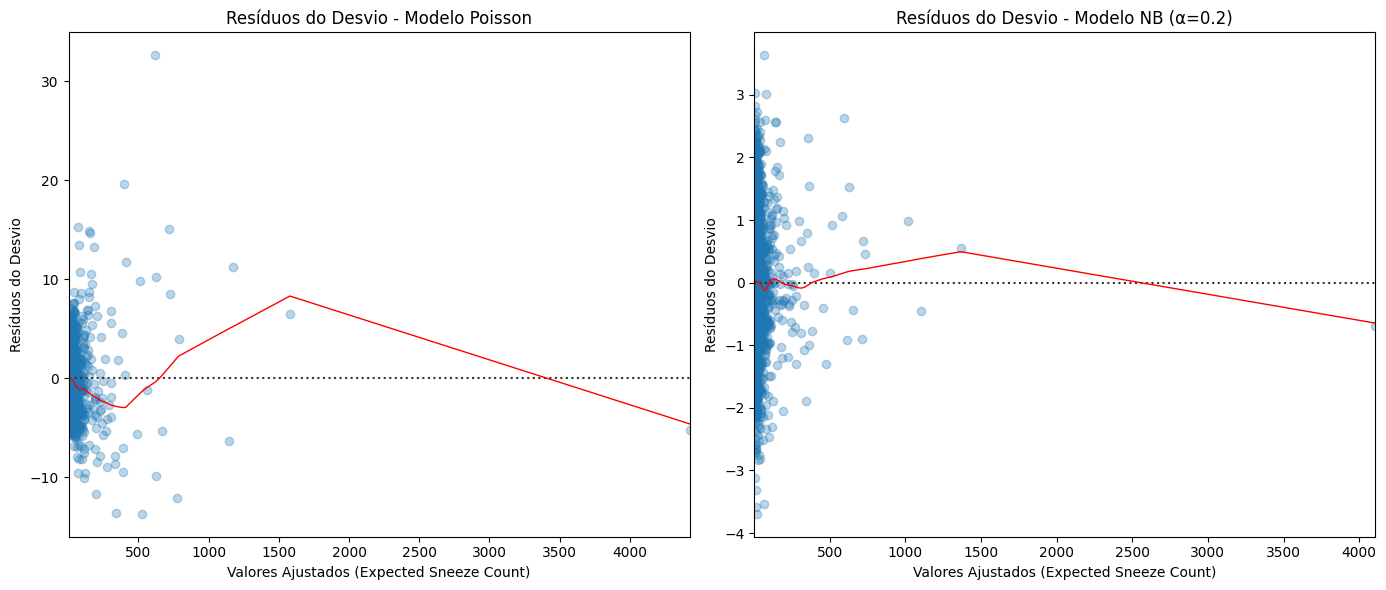

In [16]:
plt.figure(figsize=(14, 6))

# Resíduos do Modelo de Poisson
plt.subplot(1, 2, 1)
sns.residplot(x=results.fittedvalues, y=results.resid_deviance, lowess=True,
              scatter_kws={'alpha': 0.3}, line_kws={'color': 'red', 'lw': 1})
plt.title('Resíduos do Desvio - Modelo Poisson')
plt.xlabel('Valores Ajustados (Expected Sneeze Count)')
plt.ylabel('Resíduos do Desvio')

# Resíduos do Modelo Binomial Negativo
plt.subplot(1, 2, 2)
sns.residplot(x=ajuste_nb.fittedvalues, y=ajuste_nb.resid_deviance, lowess=True,
              scatter_kws={'alpha': 0.3}, line_kws={'color': 'red', 'lw': 1})
plt.title(f'Resíduos do Desvio - Modelo NB (α=0.2)')
plt.xlabel('Valores Ajustados (Expected Sneeze Count)')
plt.ylabel('Resíduos do Desvio')

plt.tight_layout()
plt.show()

Podemos concluir que o modelo Binomial Negativo é uma escolha melhor de ajuste que o modelo de Poisson já que o desvio e o AIC diminuiram drasticamente de um modelo para outro. Isso pode ser visto claramente também pelos gráficos onde a faixa vermelha diminuiu muito a sua amplitude do modelo de Poisson para o modelo NB



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [17]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


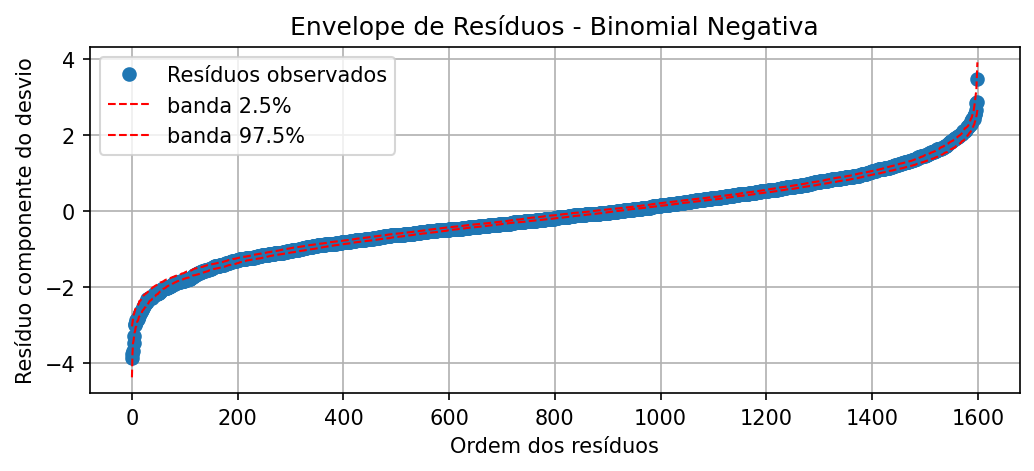

In [18]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [19]:
# Cálculo do Efeito Médio Marginal (AME) para todas as variáveis
margeff = ajuste_nb.get_margeff(at='mean', method='dydx')
margeff_summary = margeff.summary_frame().loc[['C(alcohol)[T.1]', 'C(antihist)[T.1]']]

# Extração dos resultados
ame_alcohol = margeff_summary.loc['C(alcohol)[T.1]', 'dy/dx']
p_alcohol = margeff_summary.loc['C(alcohol)[T.1]', 'Pr(>|z|)']
ame_antihist = margeff_summary.loc['C(antihist)[T.1]', 'dy/dx']
p_antihist = margeff_summary.loc['C(antihist)[T.1]', 'Pr(>|z|)']

print("Tabela de Efeitos Médios Marginais (AME)")
print(margeff_summary.round(4))


Tabela de Efeitos Médios Marginais (AME)
                    dy/dx  Std. Err.        z  Pr(>|z|)  Conf. Int. Low  \
C(alcohol)[T.1]    9.3334     0.5660  16.4914       0.0          8.2241   
C(antihist)[T.1] -11.5076     0.6734 -17.0894       0.0        -12.8274   

                  Cont. Int. Hi.  
C(alcohol)[T.1]          10.4426  
C(antihist)[T.1]        -10.1878  


Para chegar nos resultados que queremos precisamos olhar para o valor do dy/dx, que é o Efeito Médio Marginal. Observando os resultados podemis concluir que o consumo de álcool aumenta em média entre 9 e 10 espirros em relação a indivíduos que não ingeriram álcool. Em relação ao consumo do remédio a quantidade de espirros diminui em média entre 11 e 12 espirros em comparação com indivíduos que não usaram o remédio.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
# Separando as variáveis em Treino e Teste
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42
)

formula = 'nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen'
alpha_nb = 0.2

# Ajuste Poisson
model_pois = smf.glm(formula=formula, data=df_train, family=sm.families.Poisson())
ajuste_pois = model_pois.fit()
# Ajuste Binomial Negativo
model_nb = smf.glm(formula=formula, data=df_train, family=sm.families.NegativeBinomial(alpha=alpha_nb))
ajuste_nb = model_nb.fit()

In [22]:
# Previsões no conjunto de teste
pred_pois = ajuste_pois.predict(df_test)
pred_nb = ajuste_nb.predict(df_test)

# Valores observados
y_true = df_test['nsneeze']

In [23]:
# Cálculo das Métricas
metrics = pd.DataFrame(index=['EQM', 'EAM'])

# Poisson
metrics['Poisson'] = [
    mean_squared_error(y_true, pred_pois),
    mean_absolute_error(y_true, pred_pois)
]

# Binomial Negativo
metrics[f'NB (α={alpha_nb})'] = [
    mean_squared_error(y_true, pred_nb),
    mean_absolute_error(y_true, pred_nb)
]

print("Resultados das Métricas Preditivas no Conjunto de Teste")
print(metrics.round(3))

Resultados das Métricas Preditivas no Conjunto de Teste
      Poisson  NB (α=0.2)
EQM  1370.549    1942.372
EAM    14.706      15.208


A partir dos resultados obtidos acima podemos concluir que o modelo de Poisson possui um valor menor para o EQM e o EAM. Com isso é verdade dizer que mesmo o modelo Binomial Negativo possui um melhor ajuste em relação ao desvio (AIC) o modelo de Poisson é o que melhor apresenta desempenho preditivo.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

Vamos considerar o modelo de Poisson para gerar as previsões, já que foi o modelo com maior desempenho preditivo. Além disso vamos considerar o valor de baixa concentração de polém sendo 20 e de alta sendo 110

In [24]:
# Modelando usando Poisson
formula = 'nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen'
model_pois = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
ajuste_pois = model_pois.fit()

In [25]:
# Definir perfis para a previsão
new_profiles = pd.DataFrame({
    'alcohol': [0, 1],
    'antihist': [1, 0],
    'smoker': [0, 1],
    'age': [30.0, 50.0],
    'pollen': [20.0, 110.0]
})
new_profiles.index = ['Indivíduo A', 'Indivíduo B']

In [26]:
# Previsão
predictions = ajuste_pois.predict(new_profiles)

# Resultados
results = new_profiles.copy()
results['Predição Média (nsneeze)'] = predictions.round(1)

print("Previsão do Número Esperado de Espirros")
print(results)

Previsão do Número Esperado de Espirros
             alcohol  antihist  smoker   age  pollen  Predição Média (nsneeze)
Indivíduo A        0         1       0  30.0    20.0                       3.1
Indivíduo B        1         0       1  50.0   110.0                     179.5


A partir dos dados obtidos pelo enunciado e usando o modelo de Poisson e os valores de polém definidos acima podemos concluir que a predição média para o nsneeze do primeiro indivíduo é entre 3 e 4 espirros e para o segundo é entre 179 e 180 espirros. Esse resultado faz sentido olhando para as outras conclusões obtidas anteriormente já que o indivíduo 2 consumiu álcool e cigarro, não utilizou o medicamento e possui uma quantidade maior de concentração de pólem no ambiente, fatores que aumentam a quantidade de espirros.